# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = D_f​(x)=2(Ax−y)^TA $$
$$ \nabla f(x) = ∇f(x)=2A^T(Ax−y) $$

$$ D_f(x) = <Ax-y,Ax-y> = <Ax-y,d(Ax-y)> + <d(Ax-y),Ax-y> = 2<Ax-y,d(Ax-y)> = 2<Ax-y,Adx> = 2(Ax-y)^TAdx =  $$
$$=2(A^T(Ax-y))^Tdx = <2A^T(Ax-y),dx>=<2A^T(Ax-y),\Delta x> $$
$$ \nabla f(x) = 2A^T(Ax-y) $$



## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax−y) = 0$$
$$A^TAx−A^Ty=0$$
$$A^TAx=A^Ty$$
$$(A^TA)^{−1}(A^TA)x=(A^TA)^{−1}A^Ty$$
$$ x =  (A^TA)^{−1}A^Ty$$

### 2.1 Реализация прямого решения

In [2]:
import numpy as np
import matplotlib.pyplot as plt

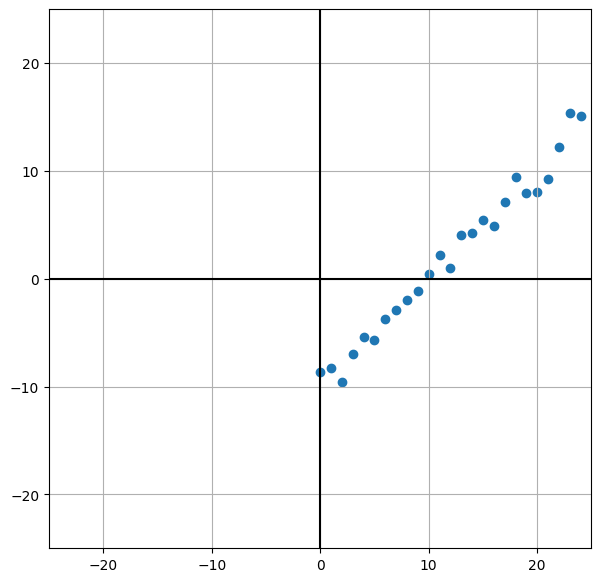

In [3]:
# ваши параметры по вариантам
a_orig = 1 # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = -10 # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = 10 # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [ ]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([-8.6684135 , -8.28472103, -9.54540029, -7.00838385, -5.37866403,
        -5.72008556, -3.73448841, -2.89145147, -1.99570857, -1.17460021,
         0.43302619,  2.20303737,  1.03493433,  4.02827408,  4.22863013,
         5.44513761,  4.86339779,  7.13513688,  9.484537  ,  7.92019511,
         8.02227172,  9.2566277 , 12.26607016, 15.38496733, 15.12369125]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - Вектор из единиц нужен, чтобы модель могла учитывать сдвиг по вертикали. Без него все прямые проходили бы через ноль.

In [4]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.solve(A.T @ A, A.T @ y)
a_b_analytical

array([ 0.9994002 , -9.89568174])

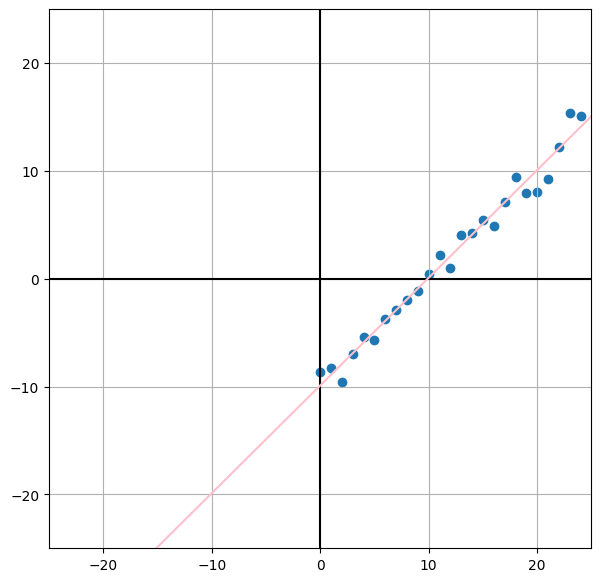

In [5]:
# постройте линию которая вышла рядом с изначальными данными

# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
y_predicted_1 = a_b_analytical[0] * (-25) + a_b_analytical[1]
y_predicted_2 = a_b_analytical[0] * (25) + a_b_analytical[1]
ax.plot([-25, 25], [y_predicted_1, y_predicted_2], color = 'pink')

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

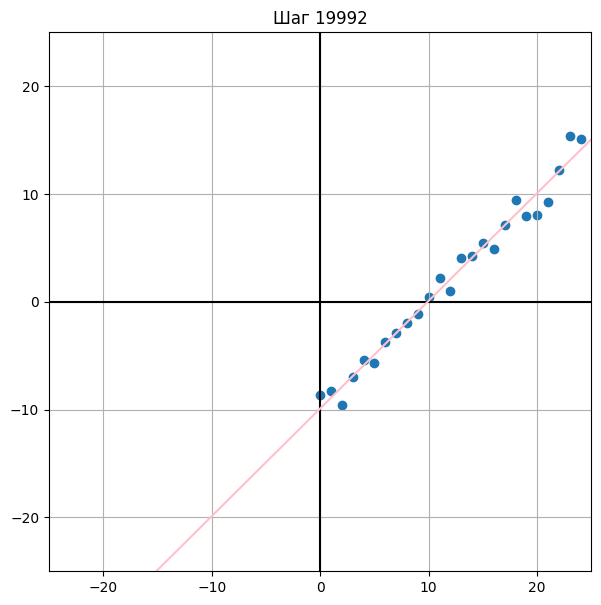

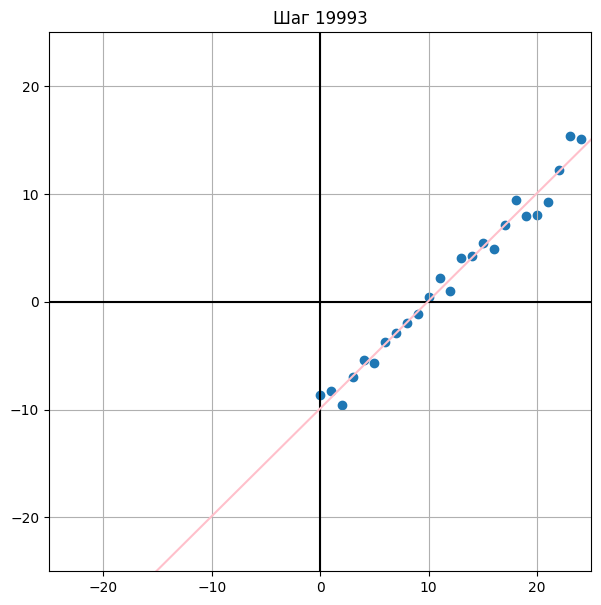

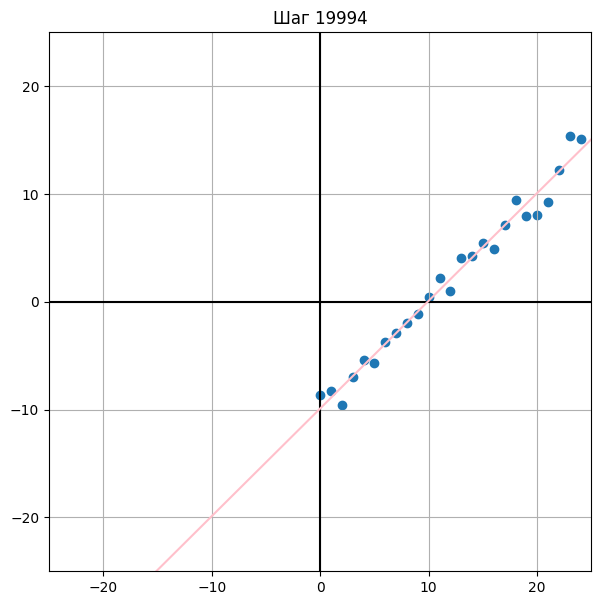

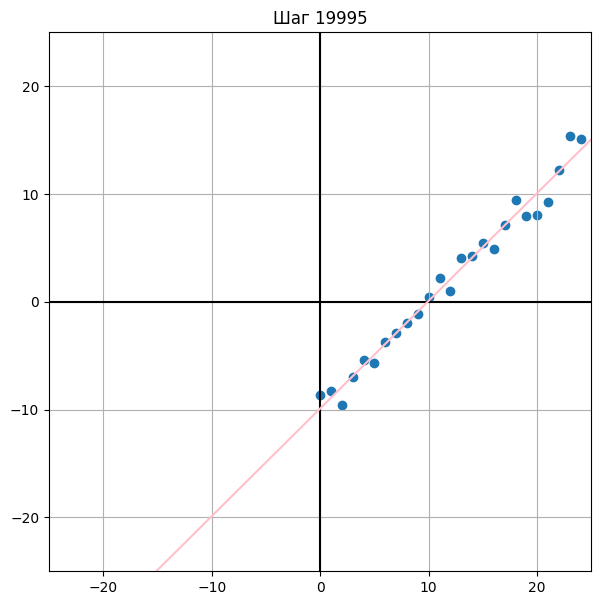

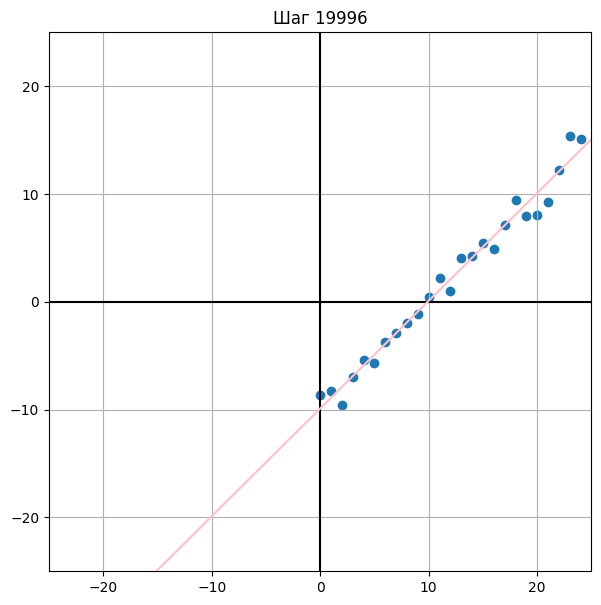

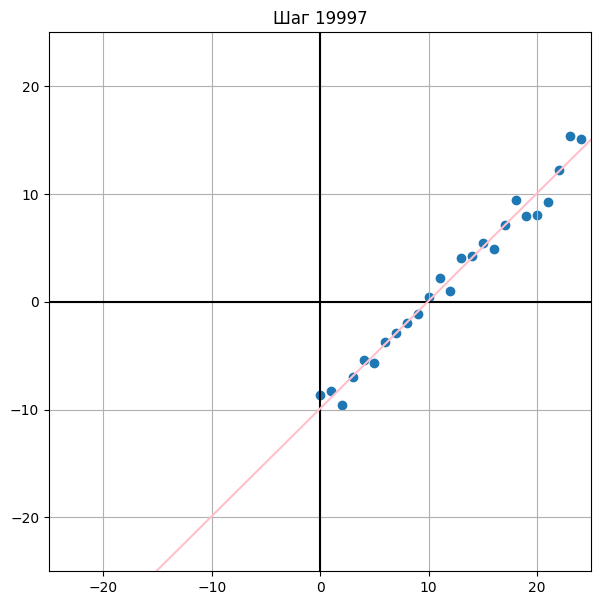

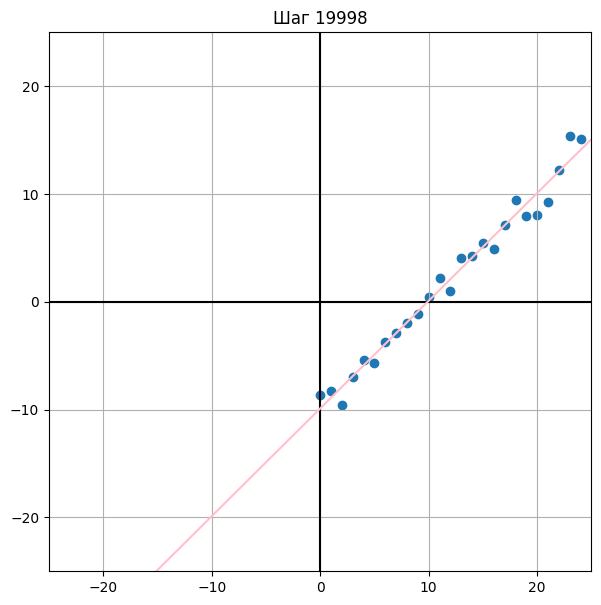

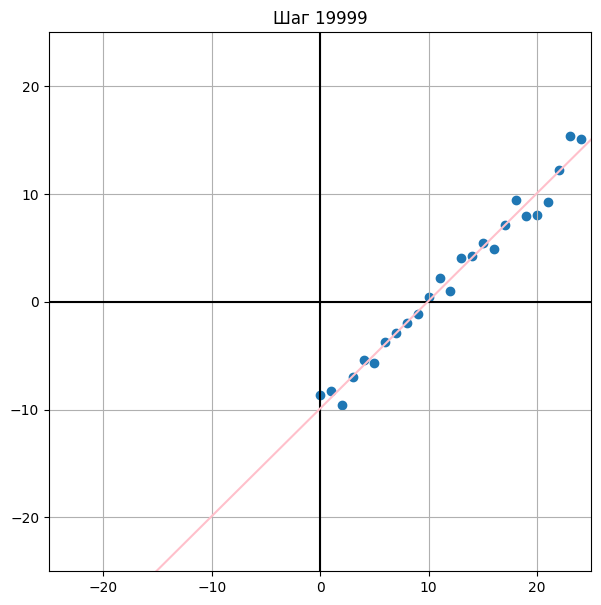

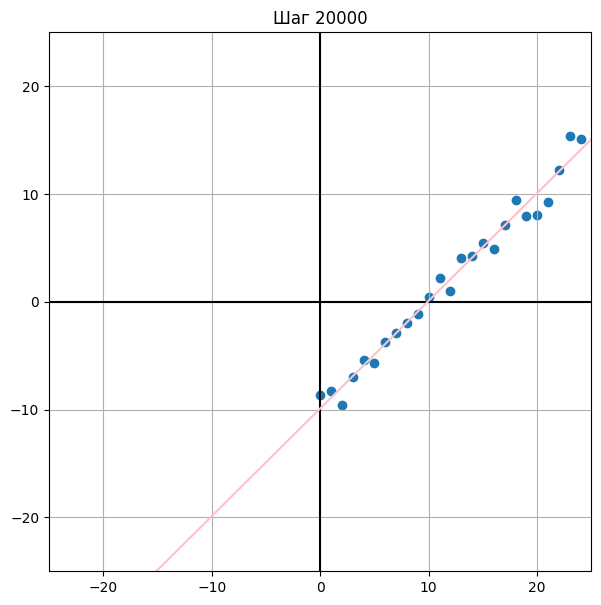

In [6]:
alpha = 0.001
a_b_analytical = np.array([0., 0.], dtype=np.float64)
n_samples = len(y)  # количество образцов (25)
it = 20000

for i in range(it):
    # Вычисляем градиент с учетом деления на n_samples
    grad = (2 / n_samples) * A.T @ (A @ a_b_analytical - y)
    # Обновляем параметры (антиградиент уже учтен знаком '-')
    a_b_analytical -= alpha * grad

    # Визуализация
    if i > it-10:
        f, ax = plt.subplots(figsize=(7, 7))
        plt.scatter(A[:, 0], y)
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)
        ax.axvline(0, color='black')
        ax.axhline(0, color='black')
        ax.grid(True)

        y_predicted_1 = a_b_analytical[0] * (-25) + a_b_analytical[1]
        y_predicted_2 = a_b_analytical[0] * 25 + a_b_analytical[1]
        ax.plot([-25, 25], [y_predicted_1, y_predicted_2], color='pink')
        ax.set_title(f'Шаг {i+1}')
        plt.show()